# A study on Grid Trading 

Assume that 
- the price follows GBM with 0 dirft 

We solve:
1. The expected profit of the Grid Trading strategy -> = 0?

In [24]:
from price_dynamic import *
from bt_grid_trading import *
from grid_trading_loss import *
from IPython.utils import io

import matplotlib.pyplot as plt

In [41]:
inputs = {
    "X0": 10000,
    "T": 1,
    "mu": 0,
    "sigma": 0.2,
    "N": 1000,
    "seed": 1,
    "interval_number": 100,
}

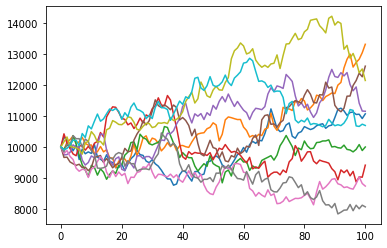

In [42]:
# Price dynamic 
X = geometric_brownien_motion(inputs)

# Plot
plt.figure()
for i in range(10):
    plt.plot(X[i,:])


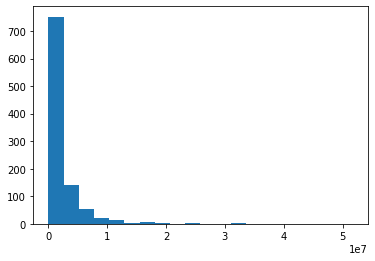

In [43]:
# Calculate the loss in the end 
end_price = X[:, -1]
losses = get_grid_loss_v4(start_price, end_price, r)

# for i in range(10):
#     print(get_grid_loss_v3(start_price, end_price[i], r), losses[i])

fg1 = plt.hist(losses, bins=20)


In [20]:
w0 = 0
r = 0.1
n_grid = 100
tp = "arth"

In [44]:
# Calculate profit in the end
profits = np.zeros(X.shape[0]) 
for i in range(X.shape[0]):
    static_grid_bt = StaticGridBT(
        w0, r, n_grid, tp, pd.Series(X[i,:]), is_trading_even=False, tx_m=0, tx_t=0, grid_quantity=0.01)

    with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
        static_grid_bt.run_on_bar()

    profits[i] = static_grid_bt.wealth.iloc[-1]

# print(f"final price: {X[:,-1]}")
print(f"final profits: {profits}")
print(f"final avg profits: {np.mean(profits)}")


final profits: [ 1.74160114e+01 -2.96037832e+02  4.79643853e+01  4.83246179e+01
  5.55533729e+01 -1.10111427e+02 -7.78703249e+00 -6.46333047e+01
 -8.31598369e+01  3.44270902e+01  1.71564188e+01 -8.89335428e+01
 -4.02709144e+02 -5.06430374e+01 -3.96595489e+02 -1.15695859e+02
  2.37017869e+01 -4.80377024e+01  4.80000000e+01 -6.14594937e+01
 -1.61461686e+01  3.78532545e+01 -6.17140884e+00 -1.31707961e+02
  4.99877580e+01 -4.39093552e+01  7.85028752e+00  2.87382321e+01
  2.73180380e+01 -2.87420095e+01 -1.68238941e+03 -6.23673219e+01
 -2.29954596e+01  1.22803597e+01 -3.90341725e+01 -3.77023414e+02
  2.32669705e+01  2.01444671e+01  2.60188214e+01 -2.87153365e+01
 -6.35590638e+01  4.75218052e+01 -5.29163208e+01 -6.75161859e+01
 -7.81682777e+01 -3.51436667e+01 -5.13223267e+01 -8.61494385e+01
 -1.13717341e+02  9.22723008e+01  5.94825402e+00  5.80000000e+01
 -2.55556961e+01  7.05687077e+00  8.02970468e+01  4.44547863e+01
 -9.71066179e+01  3.34873876e+01 -1.78814134e+02 -3.05040627e+02
  4.297220

(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   2.,
          1.,   4.,   5.,   5.,  21.,  31.,  70., 256., 601.]),
 array([-2576.13650316, -2441.81008809, -2307.48367301, -2173.15725793,
        -2038.83084285, -1904.50442777, -1770.17801269, -1635.85159761,
        -1501.52518254, -1367.19876746, -1232.87235238, -1098.5459373 ,
         -964.21952222,  -829.89310714,  -695.56669207,  -561.24027699,
         -426.91386191,  -292.58744683,  -158.26103175,   -23.93461667,
          110.3917984 ]),
 <BarContainer object of 20 artists>)

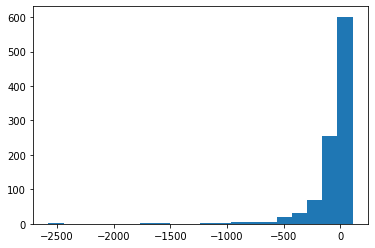

In [48]:
plt.hist(profits, bins=20)
